In [51]:
# import liabraries
import tensorflow
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from keras.utils import np_utils
from keras.models import Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [52]:
# Load the dataset
(X_train,Y_train), (X_test, Y_test) = cifar10.load_data()

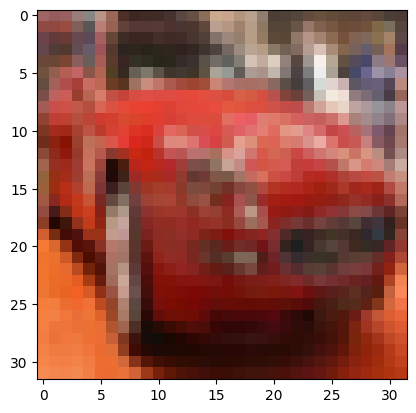

In [53]:
plt.imshow(X_train[5])

In [54]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [55]:
# Building the inpur vector
# Reshape the dataset to be input
X_train = X_train.reshape(X_train.shape[0],32,32,3)
X_test = X_test.reshape(X_test.shape[0],32,32,3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [56]:
# Normalizing the data to help with the training
X_train = X_train/255
X_test = X_test/255

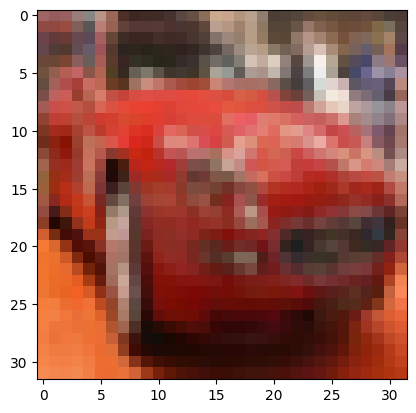

In [57]:
plt.imshow(X_train[5])

In [58]:
# One-hot encoding using np_utils
no_classes = 10
print("Shape before one-hot encoding : ", Y_train.shape)
Y_train = np_utils.to_categorical(Y_train, no_classes)
Y_test = np_utils.to_categorical(Y_test, no_classes)
print("Shape after one-hot encoding : ", Y_train.shape,Y_test.shape)


Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding :  (50000, 10) (10000, 10)


In [59]:
print(X_train[0].shape)

(32, 32, 3)


In [60]:
# Building the model
model = Sequential([
    Conv2D(50, kernel_size=(3,3), strides = (1,1), padding = 'same', activation='relu', input_shape = (32,32,3)),
    Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation ='relu'),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),
    Conv2D(125, kernel_size = (3,3), strides = (1,1), padding ='same', activation ='relu'),
    MaxPool2D(pool_size = (2,2)),
    Dropout(0.25),

    Flatten(),

    Dense(500, activation ='relu'),
    Dense(250, activation = 'relu'),
    Dropout(0.25),
    Dense(10, activation = 'softmax')

])

In [61]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy',metrics = ['accuracy'])

In [62]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [63]:
model.fit(X_train, Y_train, epochs = 10, batch_size = 128, validation_data=(X_test,Y_test))

Epoch 1/10
391/391 [==============================] - 191s 484ms/step - loss: 1.4717 - accuracy: 0.4644 - val_loss: 1.0678 - val_accuracy: 0.6276
Epoch 2/10
391/391 [==============================] - 197s 503ms/step - loss: 0.9862 - accuracy: 0.6549 - val_loss: 0.8597 - val_accuracy: 0.6965
Epoch 3/10
391/391 [==============================] - 197s 503ms/step - loss: 0.7835 - accuracy: 0.7262 - val_loss: 0.7560 - val_accuracy: 0.7388
Epoch 4/10
391/391 [==============================] - 203s 518ms/step - loss: 0.6589 - accuracy: 0.7721 - val_loss: 0.7020 - val_accuracy: 0.7568
Epoch 5/10
391/391 [==============================] - 203s 519ms/step - loss: 0.5467 - accuracy: 0.8081 - val_loss: 0.7010 - val_accuracy: 0.7523
Epoch 6/10
391/391 [==============================] - 211s 540ms/step - loss: 0.4524 - accuracy: 0.8417 - val_loss: 0.6782 - val_accuracy: 0.7762
Epoch 7/10
391/391 [==============================] - 220s 563ms/step - loss: 0.3834 - accuracy: 0.8648 - val_loss: 0.6835 -

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 75)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 75)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                  

In [65]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('loss : ',score[0])
print('accuracy : ', score[1])

# Therefore the accuracy 
print("Accuracy of the model developed : {} %".format(score[1]*100))

loss :  0.7921159863471985
accuracy :  0.777999997138977
Accuracy of the model developed : 77.7999997138977 %
